In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [19]:
data_path = "data/combined/"
data_file = "amplitude_csi_dataframe.pkl"

DISCRETE_VARIABLES = ["person"]
TARGET_VARIABLE = "position"
STATE = 42

data_df: pd.DataFrame = pd.read_pickle(data_path + data_file)

# Convert all column names to strings
data_df.columns = data_df.columns.astype(str)

print(data_df.head())

   person  position            6            7            8            9  \
0       1        15  1065.800171  1122.000000  1140.959717  1149.192749   
1       1        15  1113.772827  1143.942749  1154.906494  1169.500732   
2       1        15  1124.308228  1160.555908  1165.652588  1186.630981   
3       1        15  1029.971313  1088.882446  1119.114380  1135.856445   
4       1        15   940.240906   993.563782  1015.406311  1025.750488   

            10           11           12           13  ...        241  \
0  1176.137695  1157.608276  1277.454468  1367.686035  ...  30.594116   
1  1203.415161  1205.308716  1289.960083  1381.813354  ...  93.776329   
2  1203.795654  1217.792236  1291.743774  1373.600342  ...  74.202423   
3  1169.920044  1180.042358  1261.740112  1352.575684  ...  47.010635   
4  1037.167725  1055.597046  1118.517334  1198.773071  ...  39.319206   

         242        243        244        245        246        247  \
0  74.148499  33.241539  33.105892  72.

In [20]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

categorical_features = DISCRETE_VARIABLES
numerical_features = data_df.columns.difference(categorical_features + [TARGET_VARIABLE])
features = categorical_features + numerical_features.tolist()
input_data = data_df.drop(columns=TARGET_VARIABLE)

numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
)

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", "passthrough", categorical_features),
        ("num", numeric_transformer, numerical_features),
    ]
)

preprocessed_data: np.ndarray = preprocessor.fit_transform(input_data)
print(preprocessed_data.shape)
print(features)
print(preprocessed_data[:5])

(2012000, 235)
['person', '10', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '11', '110', '111', '112', '113', '114', '115', '116', '118', '119', '12', '120', '121', '122', '123', '124', '125', '126', '13', '130', '131', '132', '133', '134', '135', '136', '137', '138', '14', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '15', '150', '151', '152', '153', '154', '155', '156', '157', '158', '159', '16', '160', '161', '162', '163', '164', '165', '166', '168', '169', '17', '170', '171', '172', '173', '174', '175', '176', '177', '178', '179', '18', '180', '181', '182', '183', '184', '185', '186', '187', '188', '189', '19', '190', '191', '192', '193', '194', '195', '196', '197', '198', '199', '20', '200', '201', '202', '204', '205', '206', '207', '208', '209', '21', '210', '211', '212', '213', '214', '215', '216', '217', '218', '219', '22', '220', '221', '222', '223', '224', '225', '226', '227', '228', '229', '23', '230', '232', '233', '234', '

In [24]:
from sklearn.cluster import KMeans

range_params = range(6, 19, 2)

for n_clusters in range_params:
    kmeans = KMeans(n_clusters=n_clusters, random_state=STATE)
    kmeans.fit(preprocessed_data)
    data_df[f"{n_clusters} clusters"] = kmeans.labels_

print(data_df.head())

   person  position            6            7            8            9  \
0       1        15  1065.800171  1122.000000  1140.959717  1149.192749   
1       1        15  1113.772827  1143.942749  1154.906494  1169.500732   
2       1        15  1124.308228  1160.555908  1165.652588  1186.630981   
3       1        15  1029.971313  1088.882446  1119.114380  1135.856445   
4       1        15   940.240906   993.563782  1015.406311  1025.750488   

            10           11           12           13  ...         248  \
0  1176.137695  1157.608276  1277.454468  1367.686035  ...  107.018692   
1  1203.415161  1205.308716  1289.960083  1381.813354  ...   32.280025   
2  1203.795654  1217.792236  1291.743774  1373.600342  ...   41.400482   
3  1169.920044  1180.042358  1261.740112  1352.575684  ...   24.839485   
4  1037.167725  1055.597046  1118.517334  1198.773071  ...   55.000000   

         249        250  6 clusters  12 clusters  18 clusters  8 clusters  \
0  69.079666  42.201897    

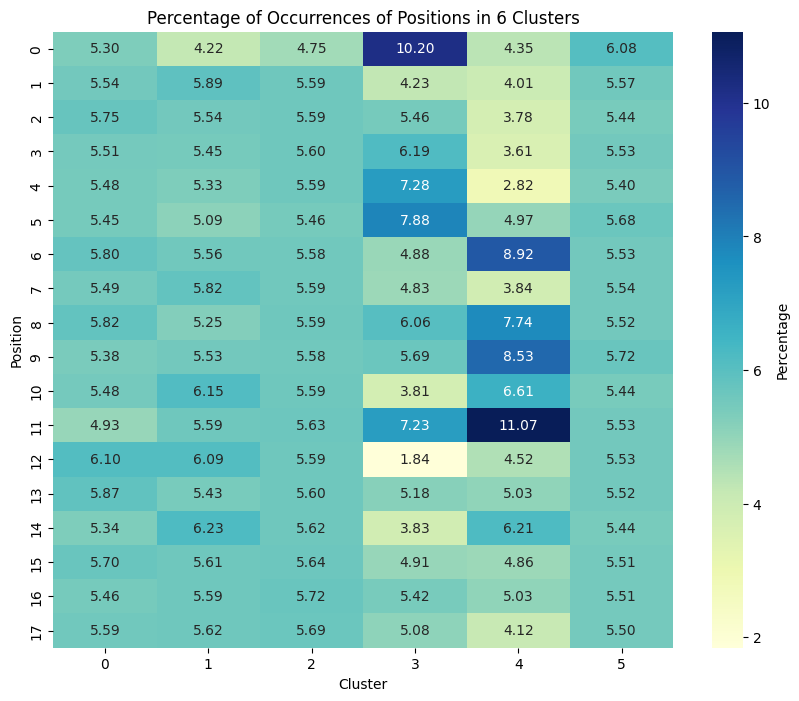

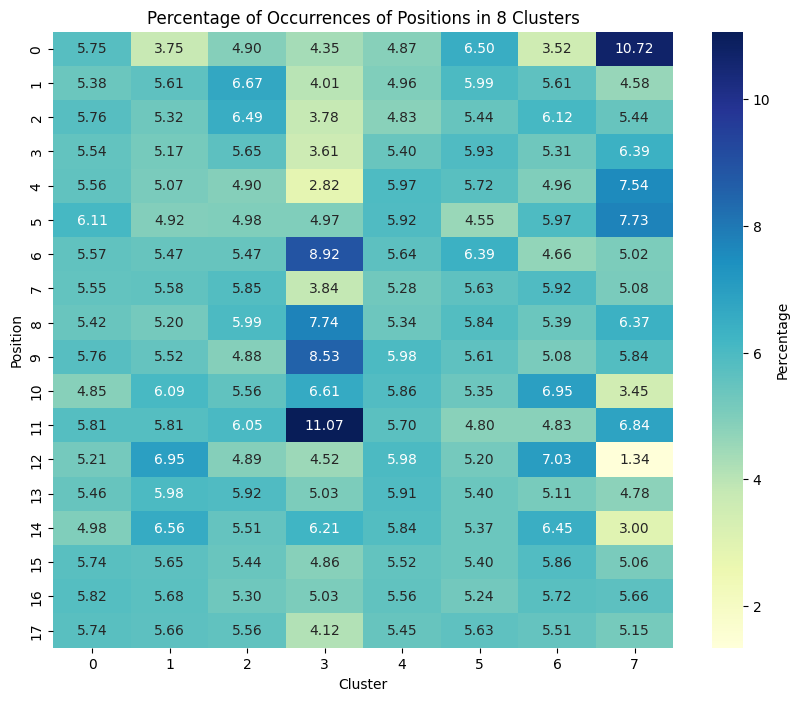

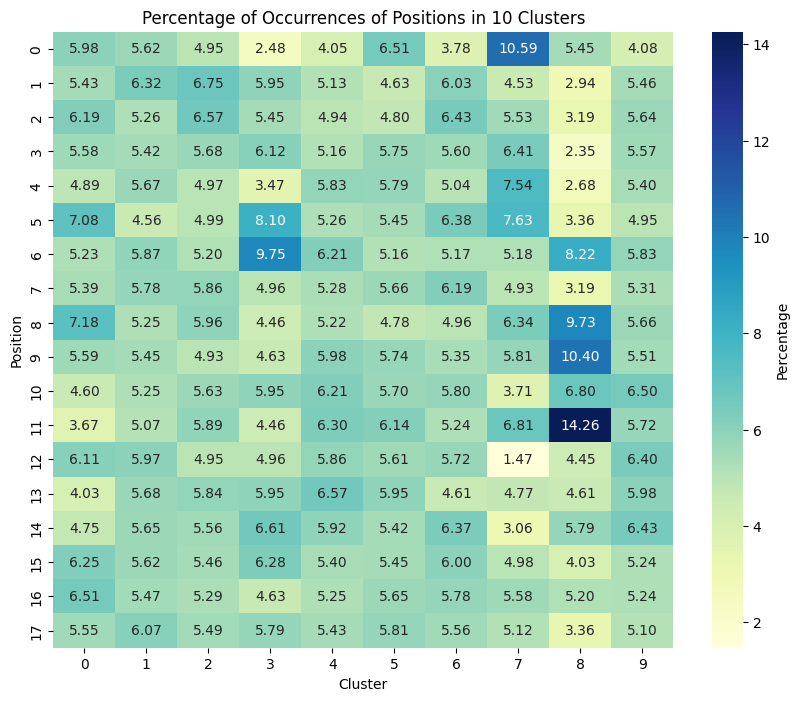

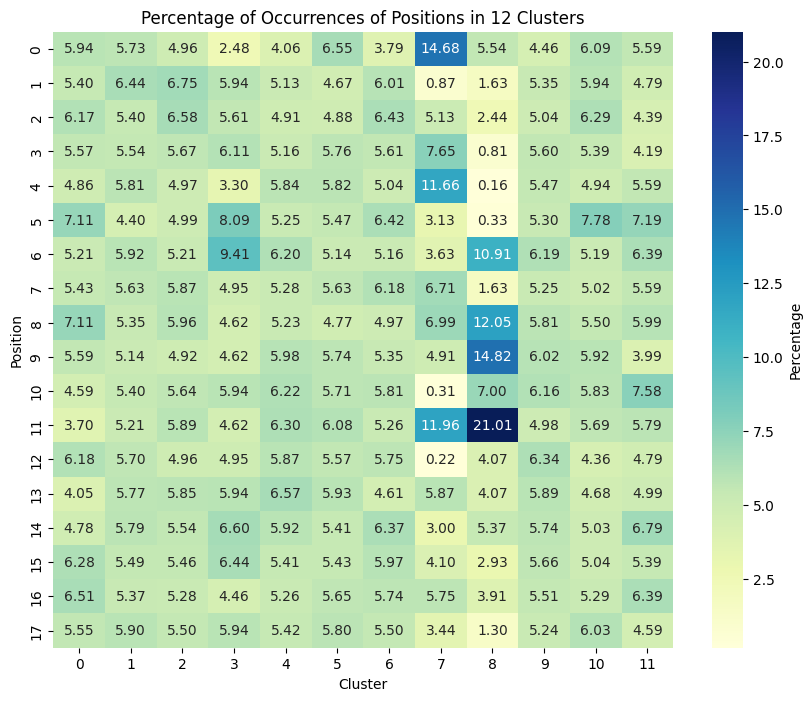

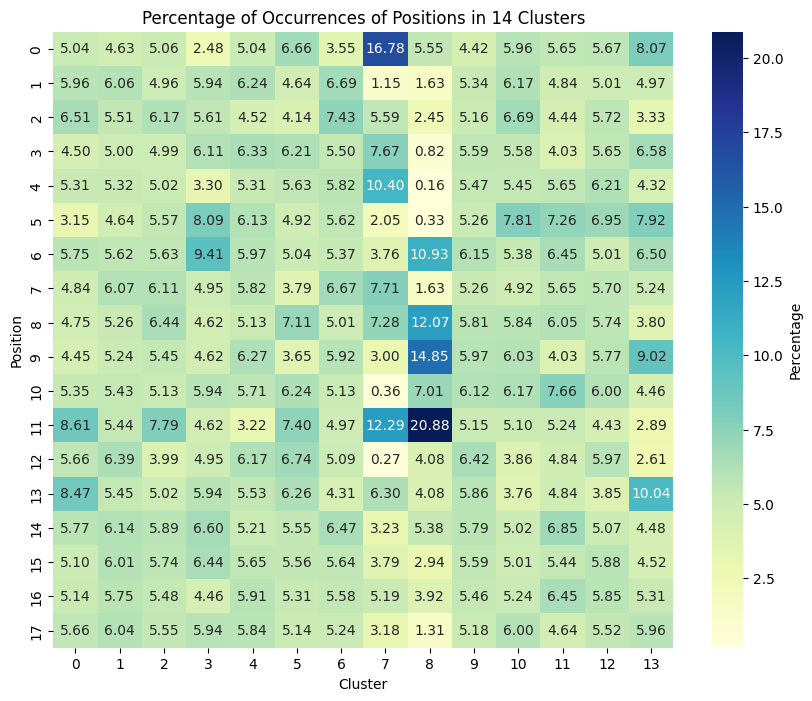

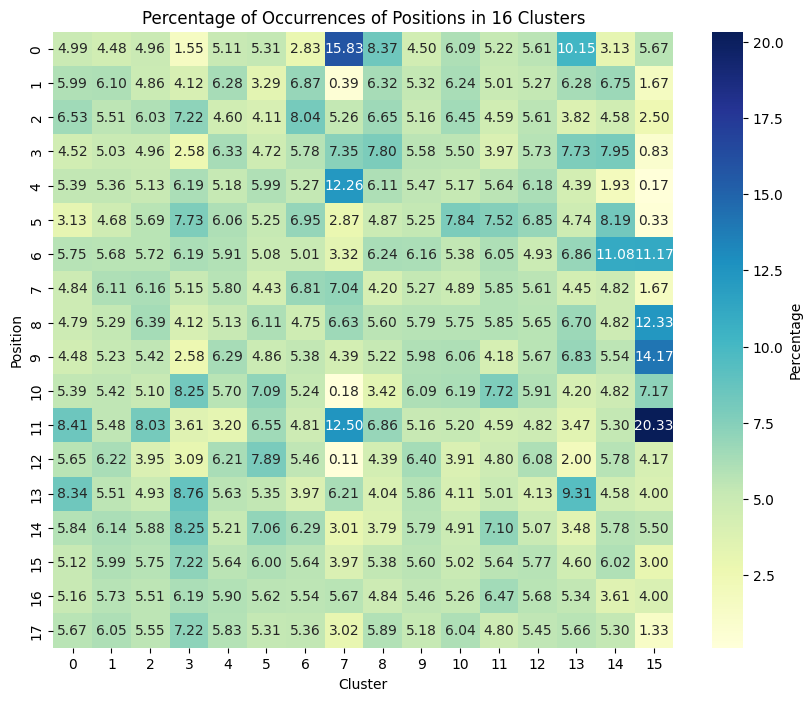

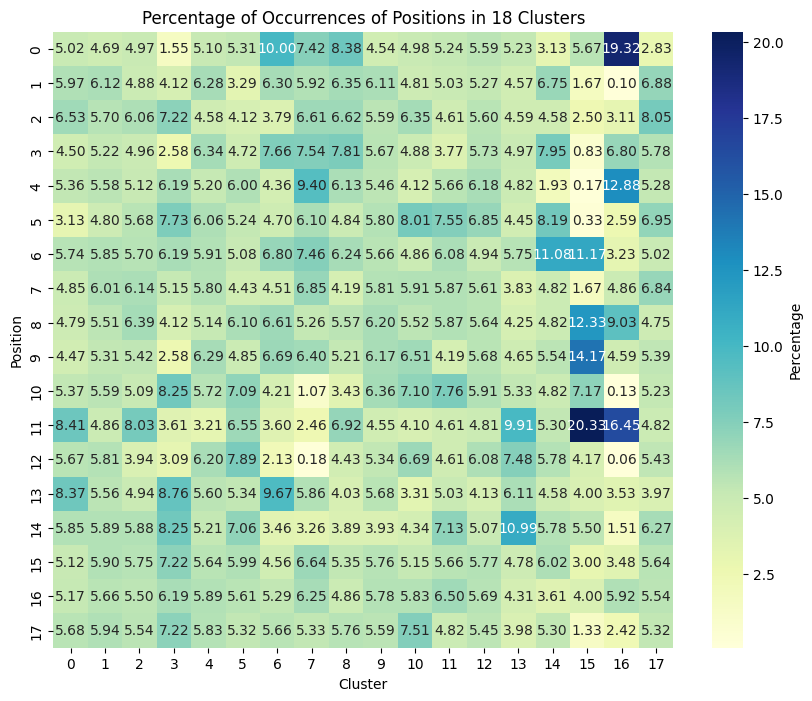

In [26]:
for n_clusters in range_params:
    contingency_table = pd.crosstab(
        data_df["position"], data_df[f"{n_clusters} clusters"]
    )
    percentage_table = contingency_table.div(contingency_table.sum(axis=0), axis=1) * 100

    plt.figure(figsize=(10, 8))
    sns.heatmap(
        percentage_table,
        annot=True,
        fmt=".2f",
        cmap="YlGnBu",
        cbar_kws={"label": "Percentage"},
    )

    plt.title(f"Percentage of Occurrences of Positions in {n_clusters} Clusters")
    plt.xlabel("Cluster")
    plt.ylabel("Position")
    plt.show()